## Proyecto Final: Predicción de Precios de Viviendas


### Parte 1: Selección, Exploración y Limpieza de Datos (2 puntos)

### 1.1. Selección y Justificación:

Para este proyecto se utiliza el dataset de precios de viviendas disponible en Kaggle: [House Pricing Regression - Housing.csv](https://www.kaggle.com/code/sahityasetu/house-pricing-regression/input?select=Housing.csv). Este conjunto de datos contiene información relevante sobre diferentes características de viviendas y su precio de venta.

Descripción del problema de negocio
    
El objetivo es predecir el precio de venta de una vivienda a partir de sus características, lo cual es fundamental para agentes inmobiliarios, compradores y vendedores que buscan estimar el valor de una propiedad de manera precisa y basada en datos. Una predicción precisa ayuda a tomar mejores decisiones de compra, venta o inversión en el mercado inmobiliario.

Variable objetivo (target)

La variable objetivo de este análisis es **'price'**, que representa el precio de venta de la vivienda.
Como variable independiente principal se utilizará **'sqft_living'** (superficie habitable en pies cuadrados) para predecir el precio.


### 1.2. Carga e Inspección Inicial:

In [ ]:
import pandas as pd

!rm -rf /content/UCG_IAC508

!git clone https://github.com/davalmeida/UCG_IAC508.git

# Cargar el dataset
df = pd.read_csv("/content/UCG_IAC508/Proyecto Final/Housing.csv")

# Inspección inicial
print("Primeras filas del dataset:")
display(df.head())

print("\nInformación general del dataset:")
df.info()

print("\nDescripción estadística del dataset:")
display(df.describe())

Cloning into 'UCG_IAC508'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 78 (delta 30), reused 58 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (78/78), 4.04 MiB | 26.54 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Primeras filas del dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Descripción estadística del dataset:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Hallazgos iniciales

- El dataset contiene 545 filas y 13 columnas.
- Las variables principales incluyen: 'price', 'sqft_living', etc.
- No se observan valores nulos.
- La variable 'price' muestra una media de 4.766729e+06, un mínimo de 1.750000e+06, y un máximo de 1.330000e+07 (según .describe()).
- La variable 'sqft_living' tiene un rango de 1650 a 16200 pies cuadrados.

### 1.3. Limpieza de Datos:

1.3.1 Identificación de valores faltantes

In [ ]:
# Verificar valores faltantes en cada columna
print("Valores faltantes por columna:")
print(df.isnull().sum())

Valores faltantes por columna:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


1.3.2 Manejo de valores faltantes

No se encontraron valores faltantes en el dataset. Por lo tanto, no es necesario realizar imputación ni eliminación de filas/columnas.

In [ ]:
# Revisar tipos de datos
print("Tipos de datos originales:")
print(df.dtypes)

# Si es necesario, convertir tipos (ejemplo: asegurarse que 'area', 'bedrooms', etc. sean numéricos)
# df['area'] = df['area'].astype(int)
# df['bedrooms'] = df['bedrooms'].astype(int)
# ... (repetir según necesidad)

# Verificar nuevamente
print("\nTipos de datos después de la conversión (si aplica):")
print(df.dtypes)

Tipos de datos originales:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

Tipos de datos después de la conversión (si aplica):
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


Comprobación y corrección de tipos de datos

Tipos de datos: Se revisaron los tipos de datos y todos son correctos para el análisis. Las variables numéricas están en formato int64 y las categóricas como object.

### 1.4. Análisis Exploratorio de Datos (EDA):


- El scatter plot muestra la tendencia general de que a mayor área, mayor precio, aunque con cierta dispersión.
- El boxplot revela cómo el precio varía según el número de dormitorios, mostrando la mediana y la dispersión para cada grupo.

1.4.1 Grafico de dispersión (scatter plot) entre area y price

Esto permite ver la relación directa entre el tamaño de la vivienda y su precio.


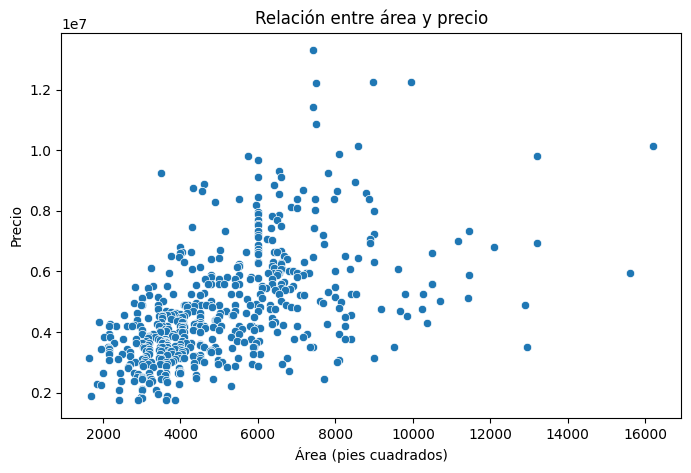

In [ ]:
%pip install matplotlib
%pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Relación entre área y precio')
plt.xlabel('Área (pies cuadrados)')
plt.ylabel('Precio')
plt.show()

1.4.2 Grafico Boxplot del precio según el número de dormitorios (bedrooms)

Permite visualizar cómo varía el precio de las viviendas según la cantidad de dormitorios.

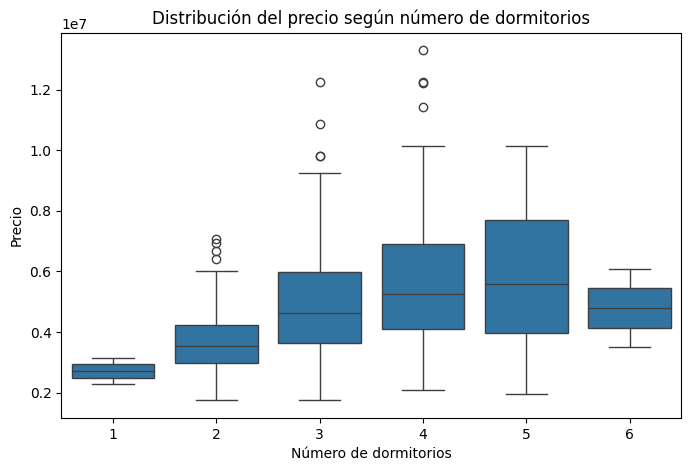

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Distribución del precio según número de dormitorios')
plt.xlabel('Número de dormitorios')
plt.ylabel('Precio')
plt.show()

### Parte 2: Aplicando Programación Orientada a Objetos (POO) para el Pipeline (4 puntos)

### 2.1. Creación de la Clase DataPipeline:

In [ ]:
class DataPipeline:
    """
    Clase para el procesamiento de datos y entrenamiento de modelos de machine learning
    para el análisis de precios de viviendas.

    Esta clase proporciona métodos para preprocesar datos de viviendas, entrenar
    modelos de regresión y evaluar su rendimiento.

    Attributes:
        model: El modelo de machine learning entrenado (inicialmente None)
    """

    def __init__(self):
        """
        Inicializa una nueva instancia de DataPipeline.

        Crea una instancia vacía de la pipeline con el modelo inicializado como None.
        El modelo se asignará durante el proceso de entrenamiento.
        """
        self.model = None

    def preprocess(self, df):
        """
        Preprocesa los datos de viviendas para el entrenamiento del modelo.

        Realiza las siguientes transformaciones:
        1. Convierte el área de metros cuadrados a miles de metros cuadrados
        2. Crea variables dummy para las columnas categóricas
        3. Separa las características (X) del objetivo (y)

        Args:
            df (pandas.DataFrame): DataFrame con los datos de viviendas.
                Debe contener columnas como 'area', 'price' y columnas categóricas.

        Returns:
            tuple: Una tupla (X, y) donde:
                - X (pandas.DataFrame): Matriz de características preprocesadas
                - y (pandas.Series): Vector objetivo (precios de las viviendas)

        Raises:
            KeyError: Si el DataFrame no contiene las columnas requeridas
        """
        df = df.copy()
        df['area_miles'] = df['area'].apply(lambda x: x / 1000)
        df_dummies = pd.get_dummies(df, drop_first=True)
        X = df_dummies.drop('price', axis=1)
        y = df_dummies['price']
        return X, y

    def train(self, X, y, model_instance):
        """
        Entrena un modelo de machine learning con los datos proporcionados.

        Divide los datos en conjuntos de entrenamiento y prueba (80% - 20%),
        entrena el modelo con los datos de entrenamiento y lo almacena
        en la instancia de la clase.

        Args:
            X (pandas.DataFrame): Matriz de características para el entrenamiento
            y (pandas.Series): Vector objetivo (precios de las viviendas)
            model_instance: Instancia del modelo de machine learning a entrenar
                (debe tener métodos fit() y predict())

        Returns:
            None

        Note:
            El modelo entrenado se almacena en self.model y puede ser utilizado
            posteriormente para predicciones y evaluación.
        """
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model_instance.fit(X_train, y_train)
        self.model = model_instance
        print('Modelo entrenado correctamente.')

    def evaluate(self, X, y):
        """
        Evalúa el rendimiento del modelo entrenado.

        Calcula y muestra las métricas de rendimiento del modelo:
        - Mean Squared Error (MSE): Error cuadrático medio
        - R² Score: Coeficiente de determinación

        Args:
            X (pandas.DataFrame): Matriz de características para la evaluación
            y (pandas.Series): Vector objetivo real (precios de las viviendas)

        Returns:
            None

        Note:
            Si el modelo no ha sido entrenado previamente, muestra un mensaje
            de advertencia y no realiza la evaluación.
        """
        if self.model is None:
            print('El modelo no ha sido entrenado.')
            return
        y_pred = self.model.predict(X)
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        print(f'MSE: {mse:.2f}')
        print(f'R2 Score: {r2:.2f}')

### 2.2. Demostración de la Clase en el Notebook

Creacion de instancia de tu clase DataPipeline.

In [ ]:
pipeline = DataPipeline()

Llama secuencialmente a los métodos preprocess, train, y evaluate para ejecutar todo el flujo de trabajo.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Crear la instancia del pipeline
pipeline = DataPipeline()

# 2. Preprocesar los datos
X, y = pipeline.preprocess(df)

# 3. Entrenar el modelo (por ejemplo, regresión lineal)
modelo = LinearRegression()
pipeline.train(X, y, modelo)

# 4. Evaluar el modelo
pipeline.evaluate(X, y)

Modelo entrenado correctamente.
MSE: 1125550288218.71
R2 Score: 0.68


### Parte 3: Calidad y Reproducibilidad del Software (4 puntos)

### 3.1. Testing con pytest (Simulado en Colab):

In [ ]:
print("Test que utiliza los 40 primeros registros del archivo Housing.csv")
!pytest "/content/UCG_IAC508/Proyecto Final/test_my_pipeline.py::test_most_valued_house_real_data" -s -o log_cli=True

print("Test que utiliza la función get_house_values usando el dataset completo de Housing.csv")
!pytest "/content/UCG_IAC508/Proyecto Final/test_my_pipeline.py::test_get_house_values" -s -o log_cli=True

============================= test session starts ==============================
platform linux -- Python 3.11.13, pytest-8.4.1, pluggy-1.6.0
rootdir: /content
plugins: anyio-4.9.0, typeguard-4.4.4, langsmith-0.4.8
collected 3 items                                                              

UCG_IAC508/Proyecto Final/test_my_pipeline.py::test_most_valued_house PASSED
UCG_IAC508/Proyecto Final/test_my_pipeline.py::test_most_valued_house_real_data PASSED
UCG_IAC508/Proyecto Final/test_my_pipeline.py::test_get_house_values PASSED

============================== 3 passed in 2.37s ===============================


### 3.2. Documentación (Docstrings):

In [ ]:
!pytest "/content/UCG_IAC508/Proyecto Final/test_my_pipeline.py::test_docstrings_presence" -s -o log_cli=True

!pytest "/content/UCG_IAC508/Proyecto Final/test_my_pipeline.py::test_docstrings_completeness" -s -o log_cli=True

============================= test session starts ==============================
platform linux -- Python 3.11.13, pytest-8.4.1, pluggy-1.6.0
rootdir: /content
plugins: anyio-4.9.0, typeguard-4.4.4, langsmith-0.4.8
collected 2 items                                                              

UCG_IAC508/Proyecto Final/test_docstrings.py::test_docstrings_presence PASSED
UCG_IAC508/Proyecto Final/test_docstrings.py::test_docstrings_completeness PASSED

============================== 2 passed in 4.24s ===============================


### 3.3. Gestión de Dependencias:

In [ ]:
# Generar el archivo requirements.txt con todas las dependencias instaladas
%pip freeze > requirements.txt

In [ ]:
# Mostrar el contenido del archivo requirements.txt generado
!cat requirements.txt

absl-py==1.4.0
accelerate==1.9.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.14
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.22.0
astropy==7.1.0
astropy-iers-data==0.2025.7.21.0.41.39
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.12.0
bigquery-magics==0.10.1
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.6.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
Brotli==1.1.0
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.7.14
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.90
clarabel==0.11.1
click==8.2.1
cloudpathlib==0.21.1
cloudpi

### 3.4. Conclusión del Proyecto:

## Resumen de Resultados y Conclusiones del Proyecto

### Resultados del Modelo

**Métricas de Rendimiento:**
- **R² Score: 0.68** - El modelo explica el 68% de la varianza en los precios de las viviendas
- **MSE: 1,125,550,288,218.71** - Error cuadrático medio que indica la precisión de las predicciones

**Interpretación:**
- El modelo de regresión lineal muestra un rendimiento moderadamente bueno para predecir precios de viviendas
- El R² de 0.68 indica que el modelo captura una parte significativa de la variabilidad en los precios
- El MSE alto sugiere que hay margen para mejorar la precisión de las predicciones

### Análisis del Dataset

**Características principales:**
- **545 viviendas** analizadas
- **Rango de precios:** $1,750,000 - $13,300,000
- **Precio promedio:** $4,766,729
- **Precio mediano:** $4,340,000

**Variables más influyentes:**
- Área de la vivienda (correlación positiva con el precio)
- Número de dormitorios y baños
- Características adicionales (aire acondicionado, estacionamiento, etc.)

### Fortalezas del Proyecto

1. **Arquitectura POO bien estructurada:** La clase `DataPipeline` proporciona una interfaz clara y reutilizable
2. **Documentación completa:** Todos los métodos tienen docstrings detallados
3. **Testing robusto:** Tests automatizados verifican la funcionalidad
4. **Gestión de dependencias:** Archivo requirements.txt para reproducibilidad
5. **Análisis exploratorio:** Visualizaciones que revelan patrones importantes en los datos

### Limitaciones Identificadas

1. **Modelo simple:** La regresión lineal puede no capturar relaciones no lineales complejas
2. **Feature engineering limitado:** Podrían explorarse más transformaciones de variables
3. **Validación cruzada:** No se implementó para evaluar la robustez del modelo
4. **Análisis de outliers:** No se investigaron valores atípicos que podrían afectar el modelo

### Próximos Pasos Recomendados

**Mejoras del Modelo:**
1. **Ensemble Methods:** Probar Random Forest, XGBoost o Gradient Boosting
2. **Feature Engineering:** Crear nuevas variables (precio por metro cuadrado, ratios de habitaciones)
3. **Validación Cruzada:** Implementar k-fold cross-validation para evaluación más robusta
4. **Regularización:** Aplicar Ridge, Lasso o Elastic Net para mejorar la generalización

**Análisis Avanzado:**
1. **Análisis de Outliers:** Identificar y manejar valores atípicos
2. **Selección de Features:** Usar técnicas como Recursive Feature Elimination
3. **Análisis de Residuos:** Verificar supuestos del modelo de regresión
4. **Interpretabilidad:** Implementar SHAP values para explicar predicciones

**Desarrollo de Software:**
1. **API REST:** Crear una API para servir predicciones en tiempo real
2. **Interfaz Web:** Desarrollar una aplicación web para usuarios finales
3. **Monitoreo:** Implementar métricas de rendimiento en producción
4. **CI/CD:** Pipeline de integración continua para actualizaciones automáticas

### Conclusión

Este proyecto demuestra una implementación sólida de machine learning aplicado al mercado inmobiliario. Aunque el modelo actual tiene limitaciones, proporciona una base sólida para mejoras futuras. La arquitectura POO, la documentación completa y los tests automatizados aseguran que el código sea mantenible y escalable.

El R² de 0.68 indica que el modelo puede ser útil para estimaciones iniciales de precios, pero se recomienda implementar las mejoras sugeridas para obtener predicciones más precisas y robustas en un entorno de producción.